# Basic Extraction of Sensitive Columns

In [1]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
import pandas as pd
df = pd.read_csv('blood-banks.csv', encoding='ISO-8859-1')
df.head(20)

,Sr No,Blood Bank Name,State,District,City,Address,Pincode,Contact No,Mobile,Helpline,...,Qualification Nodal Officer,Category,Blood Component Available,Apheresis,Service Time,License #,Date License Obtained,Date of Renewal,Latitude,Longitude
0,1,G.B. Pant Hospital Blood bank,Andaman And Nicobar Islands,SOUTH ANDAMAN,Port Blair,Atlanta Point\r\nNear Cellular Jail\r\nP.O. Ab...,744104,03192 230628,9434266561,102,...,NaN,Government,YES,NO,24X7,DL1/CLAA/ANI,14.6.1996,01.01.2012,11.675442,92.747338
1,2,I.N.H.S. Dhanvantri,Andaman And Nicobar Islands,SOUTH ANDAMAN,Port Blair,"Ashvini Nagar, Port Blair, Andaman and Nicobar...",744103,03192 248759,8001452200,NaN,...,"MBBS, MD (Pathology)",Government,NO,NO,24X7,DL2/CLAA/ANI,14.06.1996,31.12.2016,11.649693,92.717418
2,3,Pillar Health Centre Blood Bank,Andaman And Nicobar Islands,SOUTH ANDAMAN,Port Blair,"Lamba Line,\r\nP.B. 526,\r\nP.O. Junglighat, \...",744104,"03192 233193, 03192 233993",9474247585,03192 233193,...,"MBBS, MD (Medicine)",Charity,NO,NO,24X7,DL3/CLAA/ANI,08.09.2010,10.06.2015,11.653229,92.730714
3,4,"Indian Red Cross Society Blood Bank, District ...",Andhra Pradesh,ANANTAPUR,Anantapur,"Near JNTU Engeneering College, Sarada Nagar, A...",515002,08554 246344,9441192365,NaN,...,"MBBS, MD, DCP",Charity,YES,NO,24x7,13/ATP/AP/2005/BB/R,22.11.2005,21.11.2015,14.654936,77.609915
4,5,Government General Hospital Blood Bank,Andhra Pradesh,ANANTAPUR,Ananthapur,"Government General Hospital, Ananthapur",515001,08554 275024,9866695858,NaN,...,"MBBS, MD (Pathology)",Government,YES,NO,24x7,50/ATP/AP/97/BB/R,28.01.1997,01.01.2013,14.671459,77.596684
5,6,Indian Red Cross Society,Andhra Pradesh,ANANTAPUR,Ananthapur,"Blood Bank Medical Officer,Blood Bank, Indian ...",515001,8554246344,Dist.Secretary 9866023293,NaN,...,NaN,Charity,YES,NO,24x7,NaN,NaN,NaN,14.681888,77.600591
6,7,Rural Development Trust Hospital Blood Bank,Andhra Pradesh,ANANTAPUR,Bathalapalli,"Kadiri Road, Bathalapalli, Ananthapur",515661,08559 244259,9493268861,NaN,...,MD (Pathology),Charity,YES,NO,24x7,13/AT/AP/2003/BB/R,28.08.2003,Renewal under Process,14.652907,77.618826
7,8,South Central Railway Hospital Blood Bank,Andhra Pradesh,ANANTAPUR,Guntakal,"S.C. Railway Hospital, Guntakal, Ananthapuramu",515801,08552 227166,9701374501,NaN,...,NaN,Government,NO,NO,24x7,79/AT/AP/97/BB/G,28.01.1997,NaN,15.172889,77.366103
8,9,Indian Red Cross Society Blood Bank,Andhra Pradesh,ANANTAPUR,Hindupur,"Government General Hospital Blood Bank, Hindup...",515201,08556 225900,NaN,NaN,...,MBBS,Charity,NO,NO,24x7,01/ATP/AP/2011/BB\t,07.04.2011,06.06.2015,13.832533,77.492214
9,10,Indian Red Cross Society Blood bank RCH -II KA...,Andhra Pradesh,ANANTAPUR,Kadiri,"Ground Floor, APVVP (Government General Hospit...",515591,08494 221544,9989738689,NaN,...,"MBBS, Diploma in Dermatology",Government,NO,NO,24x7,ATP/AP/2008/BB/G\t,16.07.2008\t,15.07.2013,14.113089,78.157366


In [3]:
#df[' Mobile'] = df[' Mobile'].str.strip()
#df[' Mobile'] = df[' Mobile'].replace('-', '')
#df[' Mobile'] = df[' Mobile'].replace(' ', '')
#df[' Mobile'] = df[' Mobile'].astype(str).str.startswith('+91')
#df[' Mobile'] = df[' Mobile'].apply(lambda x: re.sub(r'\D', '0', str(x)))
#df['Contact No'].fillna(0,inplace=True)
df.columns

Index(['Sr No', ' Blood Bank Name', ' State', ' District', ' City', ' Address',
       'Pincode', ' Contact No', ' Mobile', ' Helpline', ' Fax', ' Email',
       ' Website', ' Nodal Officer ', ' Contact Nodal Officer',
       ' Mobile Nodal Officer', ' Email Nodal Officer',
       ' Qualification Nodal Officer', ' Category',
       ' Blood Component Available', ' Apheresis', ' Service Time',
       ' License #', ' Date License Obtained', ' Date of Renewal', ' Latitude',
       ' Longitude'],
      dtype='object')

In [4]:
import numpy as np
import re
#print(df.columns)
missing_columns=df.columns[df.isnull().any()].tolist()
missing_values_count = df[missing_columns].isnull().sum()
if df[' Mobile'].dtype != 'object':
    df[' Mobile'] = df[' Mobile'].astype(str)
df[' Mobile'].replace('', pd.NA, inplace=True)
df[' Mobile'].fillna('0000000000',inplace=True)
df[' Contact No'].fillna('0000000000',inplace=True)
df.dropna(subset=[' Address'],inplace=True)
df.head(3)

,Sr No,Blood Bank Name,State,District,City,Address,Pincode,Contact No,Mobile,Helpline,...,Qualification Nodal Officer,Category,Blood Component Available,Apheresis,Service Time,License #,Date License Obtained,Date of Renewal,Latitude,Longitude
0,1,G.B. Pant Hospital Blood bank,Andaman And Nicobar Islands,SOUTH ANDAMAN,Port Blair,Atlanta Point\r\nNear Cellular Jail\r\nP.O. Ab...,744104,03192 230628,9434266561,102,...,NaN,Government,YES,NO,24X7,DL1/CLAA/ANI,14.6.1996,01.01.2012,11.675442,92.747338
1,2,I.N.H.S. Dhanvantri,Andaman And Nicobar Islands,SOUTH ANDAMAN,Port Blair,"Ashvini Nagar, Port Blair, Andaman and Nicobar...",744103,03192 248759,8001452200,NaN,...,"MBBS, MD (Pathology)",Government,NO,NO,24X7,DL2/CLAA/ANI,14.06.1996,31.12.2016,11.649693,92.717418
2,3,Pillar Health Centre Blood Bank,Andaman And Nicobar Islands,SOUTH ANDAMAN,Port Blair,"Lamba Line,\r\nP.B. 526,\r\nP.O. Junglighat, \...",744104,"03192 233193, 03192 233993",9474247585,03192 233193,...,"MBBS, MD (Medicine)",Charity,NO,NO,24X7,DL3/CLAA/ANI,08.09.2010,10.06.2015,11.653229,92.730714


In [5]:

sensitive_columns = [
    'Pincode', ' Contact No', ' Mobile', ' Helpline', ' Fax', ' Email',
    ' Nodal Officer ', ' Contact Nodal Officer', ' Mobile Nodal Officer', ' Email Nodal Officer',
    ' License #', ' Date License Obtained', ' Date of Renewal'
]
"""
sensitive_df = df[sensitive_columns]
sensitive_df.to_csv('sensitive_data.csv', index=False)
df = pd.read_csv('sensitive_data.csv', encoding='ISO-8859-1')
df.head()"""

"\nsensitive_df = df[sensitive_columns]\nsensitive_df.to_csv('sensitive_data.csv', index=False)\ndf = pd.read_csv('sensitive_data.csv', encoding='ISO-8859-1')\ndf.head()"

In [6]:
df.columns

Index(['Sr No', ' Blood Bank Name', ' State', ' District', ' City', ' Address',
       'Pincode', ' Contact No', ' Mobile', ' Helpline', ' Fax', ' Email',
       ' Website', ' Nodal Officer ', ' Contact Nodal Officer',
       ' Mobile Nodal Officer', ' Email Nodal Officer',
       ' Qualification Nodal Officer', ' Category',
       ' Blood Component Available', ' Apheresis', ' Service Time',
       ' License #', ' Date License Obtained', ' Date of Renewal', ' Latitude',
       ' Longitude'],
      dtype='object')

# Fuzzy Classification

In [7]:
import pandas as pd
import skfuzzy as fuzz
import numpy as np

# Load your data into a Pandas DataFrame (replace 'your_data.csv' with your actual file name)
data = pd.read_csv('blood-banks.csv', encoding='ISO-8859-1')

# Define linguistic categories
universe = np.linspace(0, 1, 100)
not_sensitive = fuzz.trimf(universe, [0, 0, 0.3])
maybe_sensitive = fuzz.trimf(universe, [0, 0.5, 1])
sensitive = fuzz.trimf(universe, [0.7, 1, 1])

# Columns to evaluate for sensitivity
sensitive_columns = [
    ' Blood Bank Name', ' State', ' District', ' City', ' Address', 'Pincode',
    ' Contact No', ' Mobile', ' Helpline', ' Fax', ' Email', ' Nodal Officer ',
    ' Contact Nodal Officer', ' Mobile Nodal Officer', ' Email Nodal Officer',
    ' Qualification Nodal Officer', ' Category', ' Blood Component Available',
    ' Apheresis', ' License #', ' Date License Obtained', ' Date of Renewal',
    ' Latitude', ' Longitude'
]
# Convert all columns to numeric, coerce non-numeric values to NaN
data = data.apply(pd.to_numeric, errors='coerce')



In [8]:

# Evaluate sensitivity and add a new column indicating sensitivity level
for column in sensitive_columns:
    column_data = data[column].values/ data[column].max()

    # Calculate membership values for each category
    not_sensitive_membership = fuzz.interp_membership(universe, not_sensitive, column_data)
    maybe_sensitive_membership = fuzz.interp_membership(universe, maybe_sensitive, column_data)
    sensitive_membership = fuzz.interp_membership(universe, sensitive, column_data)

    # Determine sensitivity level based on fuzzy logic rules
    if np.any(sensitive_membership > 0.7):
        data[f'{column}_sensitivity'] = 'Sensitive'
    elif np.any(maybe_sensitive_membership > 0.5):
        data[f'{column}_sensitivity'] = 'Maybe Sensitive'
    else:
        data[f'{column}_sensitivity'] = 'Not Sensitive'
data.head(3)

,Sr No,Blood Bank Name,State,District,City,Address,Pincode,Contact No,Mobile,Helpline,...,Email Nodal Officer_sensitivity,Qualification Nodal Officer_sensitivity,Category_sensitivity,Blood Component Available_sensitivity,Apheresis_sensitivity,License #_sensitivity,Date License Obtained_sensitivity,Date of Renewal_sensitivity,Latitude_sensitivity,Longitude_sensitivity
0,1,NaN,NaN,NaN,NaN,NaN,744104.0,NaN,9.434267e+09,102.0,...,Sensitive,Not Sensitive,Not Sensitive,Not Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive
1,2,NaN,NaN,NaN,NaN,NaN,744103.0,NaN,8.001452e+09,NaN,...,Sensitive,Not Sensitive,Not Sensitive,Not Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive
2,3,NaN,NaN,NaN,NaN,NaN,744104.0,NaN,9.474248e+09,NaN,...,Sensitive,Not Sensitive,Not Sensitive,Not Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive


In [9]:
# Initialize a dictionary to store column names as keys and count of 'Sensitive' values as values
sensitive_counts = {}

# Iterate through columns in the DataFrame
for column in data.columns:
    # Check if the column ends with "_sensitivity"
    if column.endswith("_sensitivity"):
        # Count the number of 'Sensitive' values in the current column
        sensitive_count = (data[column] == 'Sensitive').sum()

        # Store the count in the dictionary with cleaned column name (without '_sensitivity' suffix)
        original_column = column.replace("_sensitivity", "").strip()
        # Add the count to the dictionary only if it is greater than zero
        if sensitive_count > 0:
            sensitive_counts[original_column] = sensitive_count

# Get the list of all sensitive columns
sensitive_columns_list = list(sensitive_counts.keys())

# Print or use the sensitive columns list as needed
print("Sensitive Columns List:", sensitive_columns_list)

#sensitive_data = data[sensitive_columns_list]

#print(sensitive_data)

Sensitive Columns List: ['Pincode', 'Contact No', 'Mobile', 'Helpline', 'Fax', 'Contact Nodal Officer', 'Mobile Nodal Officer', 'Email Nodal Officer', 'Apheresis', 'License #', 'Date License Obtained', 'Date of Renewal', 'Latitude', 'Longitude']


In [10]:
import pandas as pd

# Load the sensitive data classification CSV file into a Pandas DataFrame
data = pd.read_csv('sensitive_data.csv')

# Print basic information about the DataFrame
print("First 5 rows of the DataFrame:")
print(data.head())

print("\nColumn names:")
print(data.columns)

print("\nData types:")
print(data.dtypes)

print("\nSummary statistics:")
print(data.describe())

# Additional analysis or printing specific columns can be performed here


First 5 rows of the DataFrame:
  Pincode                  Contact No      Mobile      Helpline           Fax  \
0  744104                03192 230628  9434266561           102           NaN   
1  744103                03192 248759  8001452200           NaN           NaN   
2  744104  03192 233193, 03192 233993  9474247585  03192 233193           NaN   
3  515002                08554 246344  9441192365           NaN  08554 246344   
4  515001                08554 275024  9866695858           NaN           NaN   

                           Email                              Nodal Officer   \
0             bbgbpant@gmail.com                          Dr.Ganesh Samaddar   
1                            NaN                           Dr.Smiriti Mathur   
2  pillarbloodbank2016@gmail.com                          Dr. Sr. Cross Mary   
3                            NaN  Dr.G. Parvathi & Dr.G. Ramanjaneyulu Naidu   
4      bloodbankgghatp@gmail.com               Dr. Shiva kumar & Dr. Swapna    

 

Sensitivity Classification: 55.95


c:\Users\LAKSHMI SRI LASYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


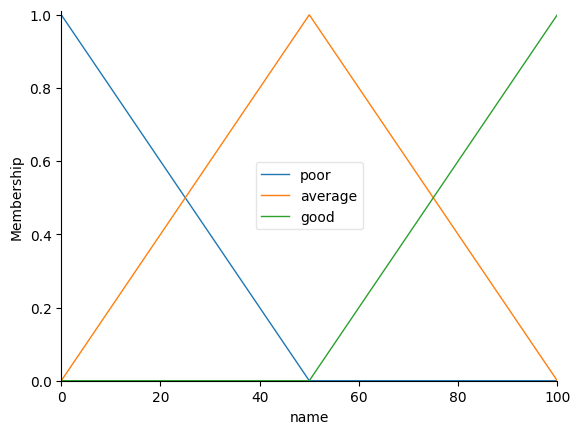

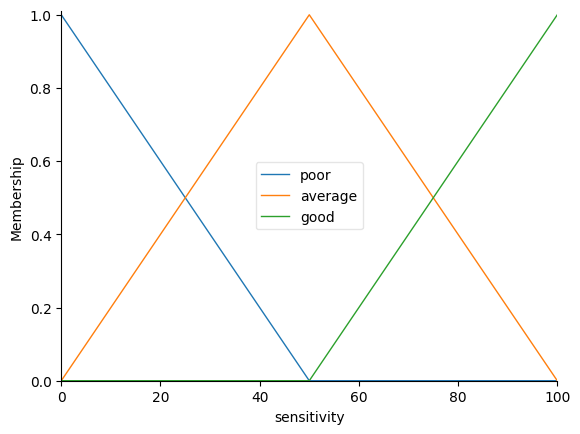

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Step 1: Define Antecedent (Input) and Consequent (Output) Variables

# Blood Bank Name
name = ctrl.Antecedent(np.arange(0, 101, 1), 'name')
name.automf(3)  # Automatically generate three fuzzy sets

# Sensitivity (Consequent variable)
sensitivity = ctrl.Consequent(np.arange(0, 101, 1), 'sensitivity')
sensitivity.automf(3)  # Automatically generate three fuzzy sets
# Step 2: Define Fuzzy Inference Rules

# Rule 1: If Blood Bank Name is meaningless, then it is sensitive
rule1 = ctrl.Rule(name['good'], sensitivity['good'])

# Rule 2: If Blood Bank Name is medium, then it is moderately sensitive
rule2 = ctrl.Rule(name['average'], sensitivity['average'])

# Rule 2: If Blood Bank Name is medium, then it is moderately sensitive
rule3 = ctrl.Rule(name['poor'], sensitivity['poor'])

# Step 3: Create Fuzzy Control System

sensitivity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
sensitivity_system = ctrl.ControlSystemSimulation(sensitivity_ctrl)

# Step 4: Set Input Values (Crisp Input)

# (Assuming crisp value for demonstration purposes, replace this with actual data)
name_input = 75

# Step 5: Perform Fuzzy Inference

sensitivity_system.input['name'] =name_input
sensitivity_system.compute()

# Step 6: Defuzzify to Get Crisp Output

sensitive_classification = sensitivity_system.output['sensitivity']

# Step 7: Print the Result
print(f"Sensitivity Classification: {sensitive_classification:.2f}")

# Step 8: Visualize the Fuzzy Sets and Membership Functions (Optional)
name.view()
sensitivity.view()